In [29]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the dfset
data = pd.read_csv('TaxiData.csv')

```
Analysis on overall dfset.
Provide info about columns and its dftypes.
State missing values and other organic analysis.
```

## Q 1.a

In [31]:
# Check df shape, summary, ...

# Identify missing values
# Plot missing values (customize as needed)
# missing_values.plot(...)

# Any change of df type conversion required?
# Check df types and missing values
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   15000 non-null  float64
 1   fare                    15002 non-null  float64
 2   trip_start_month        15002 non-null  int64  
 3   trip_start_hour         15002 non-null  int64  
 4   trip_start_day          15002 non-null  int64  
 5   trip_start_timestamp    15002 non-null  int64  
 6   pickup_latitude         15000 non-null  float64
 7   pickup_longitude        15000 non-null  float64
 8   dropoff_latitude        14520 non-null  float64
 9   dropoff_longitude       14520 non-null  float64
 10  trip_miles              15002 non-null  float64
 11  pickup_census_tract     1 non-null      float64
 12  dropoff_census_tract    10761 non-null  float64
 13  payment_type            15002 non-null  object 
 14  company                 9862 non-null 

## 1.1 Column Classification
Let's categorize the columns based on their data type based on the data provided by data.info():

- **Categorical Columns:** 
  - `payment_type`, `company`
  
- **Numerical Columns:** 
  - `fare`, `trip_start_month`, `trip_start_hour`, `trip_start_day`, `trip_miles`, `trip_seconds`, `tips`, `pickup_latitude`, `pickup_longitude`, `dropoff_latitude`, `dropoff_longitude`, `pickup_community_area`, `dropoff_community_area`, `dropoff_census_tract`
  
- **Mixed/Problematic Columns:** 
  - `trip_start_timestamp` (should be converted to datetime)
  - `pickup_census_tract` (almost entirely missing, only 1 non-null value)

## 1.2 Type Conversion
For analysis, we will convert some columns:

- `trip_start_timestamp` should be converted to datetime format.
- `pickup_latitude`, `pickup_longitude`, `dropoff_latitude`, and `dropoff_longitude` are geographical coordinates and should be of type float.
- `trip_miles` and `fare` should also be converted to float if not already.


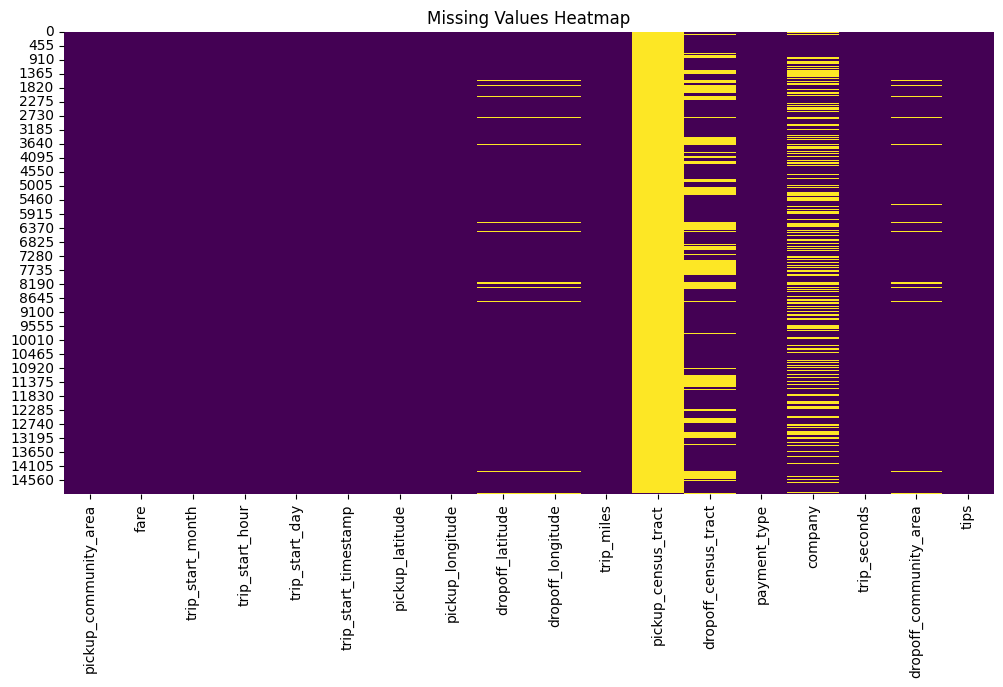

Percentage of Missing Values:
 pickup_community_area      0.013332
fare                       0.000000
trip_start_month           0.000000
trip_start_hour            0.000000
trip_start_day             0.000000
trip_start_timestamp       0.000000
pickup_latitude            0.013332
pickup_longitude           0.013332
dropoff_latitude           3.212905
dropoff_longitude          3.212905
trip_miles                 0.000000
pickup_census_tract       99.993334
dropoff_census_tract      28.269564
payment_type               0.000000
company                   34.262098
trip_seconds               0.039995
dropoff_community_area     3.372884
tips                       0.000000
dtype: float64


In [32]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Calculate the percentage of missing values
missing_values = data.isnull().sum() / len(data) * 100
print("Percentage of Missing Values:\n", missing_values)

## Handling Missing Values

The dataset contains several missing values across different columns. The method used to handle missing data depends on the type of the column (numerical or categorical). Here is the proposed strategy and its application:

### 1. **Drop `pickup_census_tract` Column**
- **Reason:** This column has only 1 non-null value out of 15,002 entries, making it almost entirely missing.
- **Action:** Dropped the column.

### 2. **Mean Imputation for Numerical Columns**
- **Reason:** Mean imputation is commonly used for numerical data as it fills in the missing values with the average of the existing values.
- **Applied On:**
  - `fare`: Missing values imputed with the mean of the column.
  - `trip_miles`: Missing values imputed with the mean of the column.
  - `trip_seconds`: Missing values imputed with the mean of the column.
  - `tips`: Missing values imputed with the mean of the column.
  - `dropoff_census_tract`: Missing values imputed with the mean of the column.
  - `dropoff_community_area`: Missing values imputed with the mean of the column.

### 3. **Mode Imputation for Categorical Columns**
- **Reason:** Mode imputation fills in the missing values with the most frequently occurring value (mode) in the column, suitable for categorical data.
- **Applied On:**
  - `company`: Missing values imputed with the mode (most common company name).
  - `payment_type`: Missing values imputed with the mode (most common payment type).

### 4. **Row Removal for Missing Geographical Coordinates**
- **Reason:** Latitude and longitude are critical for geographical analysis. Removing rows with missing values ensures that the analysis is not skewed by missing geographical data.
- **Applied On:**
  - `pickup_latitude`, `pickup_longitude`: Dropped rows with missing values.
  - `dropoff_latitude`, `dropoff_longitude`: Dropped rows with missing values.

### 5. **Conversion of Timestamp to Datetime**
- **Reason:** `trip_start_timestamp` is provided as an integer representing seconds since the epoch. Converting this to a datetime format makes it easier to analyze and extract time-related features.
- **Action:** Converted the column using `pd.to_datetime()`.

### Code for Handling Missing Values





Updated Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14520 entries, 20 to 15000
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   pickup_community_area   14520 non-null  float64       
 1   fare                    14520 non-null  float64       
 2   trip_start_month        14520 non-null  int64         
 3   trip_start_hour         14520 non-null  int64         
 4   trip_start_day          14520 non-null  int64         
 5   trip_start_timestamp    14520 non-null  datetime64[ns]
 6   pickup_latitude         14520 non-null  float64       
 7   pickup_longitude        14520 non-null  float64       
 8   dropoff_latitude        14520 non-null  float64       
 9   dropoff_longitude       14520 non-null  float64       
 10  trip_miles              14520 non-null  float64       
 11  dropoff_census_tract    14520 non-null  float64       
 12  payment_type            14

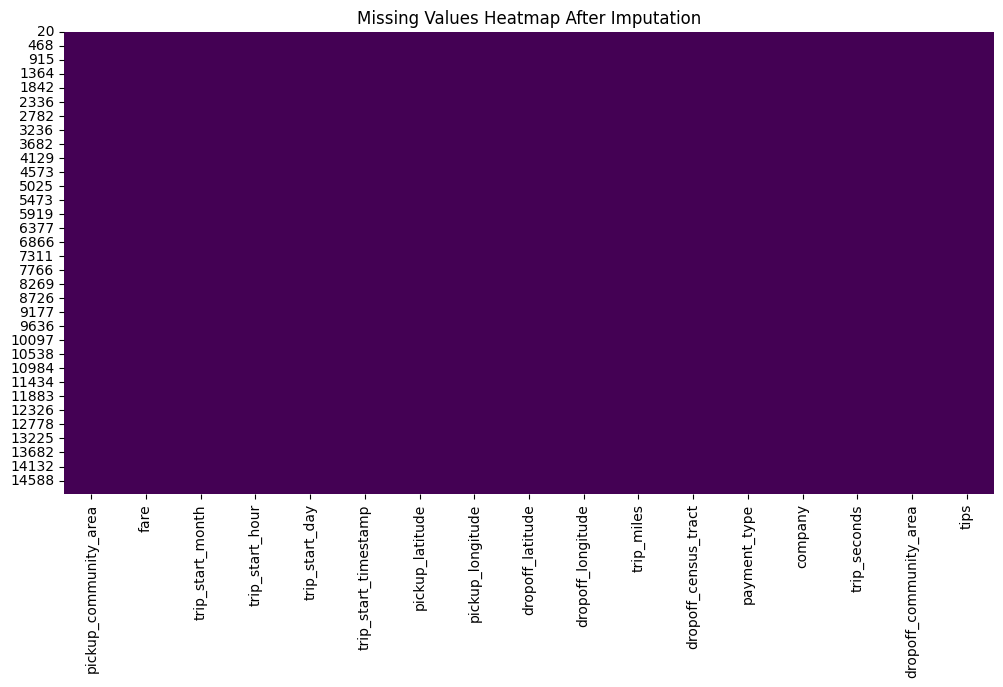

In [ ]:
# 1. Drop 'pickup_census_tract' column due to excessive missing values
data.drop(columns=['pickup_census_tract'], inplace=True)

# 2. Mean imputation for numerical columns
numerical_columns = ['fare', 'trip_miles', 'trip_seconds', 'tips', 'dropoff_census_tract', 'dropoff_community_area']
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# 3. Mode imputation for categorical columns
categorical_columns = ['company', 'payment_type']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# 4. Drop rows with missing latitude/longitude values
data.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True)

# 5. Convert 'trip_start_timestamp' to datetime
data['trip_start_timestamp'] = pd.to_datetime(data['trip_start_timestamp'], unit='s')


# Verify the changes
print("Updated Data Info:")
print(data.info())

# Visualize missing values after imputation
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap After Imputation")
plt.show()
